# Zadanie (przedziały ufności)

Wykonano pomiar liczby skrętów dla losowo wybranych odcinków przędzy o długości 1m, uzyskując wyniki: 

87, 102, 119, 81, 97, 93, 100, 114, 99, 100, 113, 93, 95, 85, 123, 99.

Zakładając, że liczba skrętów odcinków  przędzy ma rozkład normalny, znaleźć $90\%$-owe realizacje przedziałów ufności wariancji i odchylenia standardowego liczby skrętów całej partii przędzy.   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

In [2]:
data=np.array([87, 102, 119, 81, 97, 93, 100, 114, 99, 100, 113, 93, 95, 85, 123, 99])

Przedział ufności dla <b>nieznanego odchylenia standardowego $\sigma$</b> populacji, w której <b>badana cecha ma rozkład $N(\mu,\sigma^2)$</b>, w przypadku gdy <b>zarówno $\mu$ jak $\sigma$ są nieznane</b>, na podstawie $n$--elementowej próby $X_1,\ldots,X_n$ <b>$(n<50)$</b> wynosi

$$
\left(
g_1(\alpha,n-1) \cdot S^{*},
g_2(\alpha,n-1) \cdot S^{*}
\right)
$$

gdzie 

$$
g_1(\alpha,n-1)=\sqrt{\frac{n-1}{\chi^2(1-\frac{1}{2} \alpha,n-1)}} \mbox{ oraz } g_2(\alpha,n-1)=\sqrt{\frac{n-1}{\chi^2(\frac{1}{2} \alpha,n-1)}}
$$

gdzie $\chi^2(\alpha,n)$ oznacza kwantyl rzędu $\alpha$ o $n-1$ stopniach swobody rozkładu $\chi^2$.

## Zdefiniujmy zmienną losową

In [3]:
n=data.size
print(n)
X=stats.chi2(n-1)

16


## Wylicz końce przedziałów

In [4]:
alpha=0.1
bar_x=np.mean(data)
s=np.std(data,ddof=1)

In [5]:
g1=np.sqrt( (n-1)/(X.ppf(1-alpha/2)) )
g2=np.sqrt( (n-1)/(X.ppf(alpha/2)) )

In [6]:
X.ppf(alpha/2)

7.2609439276700343

In [7]:
L=g1*(s)
R=g2*(s)

## Wypisz przedział ufności

In [8]:
print(r'( %3.2f , %3.2f)' % (L,R))

( 9.27 , 17.20)


# Zadanie 2
Wykonaj zadanie za pomocą <tt>scipy</tt> i <tt>funkcji stats.chi2.interval</tt>.

In [12]:
ci = stats.chi2.interval(1-0.1, n-1, scale=s)
ci

(86.888958575955016, 299.11512823389529)

# Zadanie 3
Narysuj przedział ufności na wykresie gęstości i dystrybuanty rozkładu dla statystyki

$$
\chi^2 = \frac{nS^2}{\sigma^2}
$$

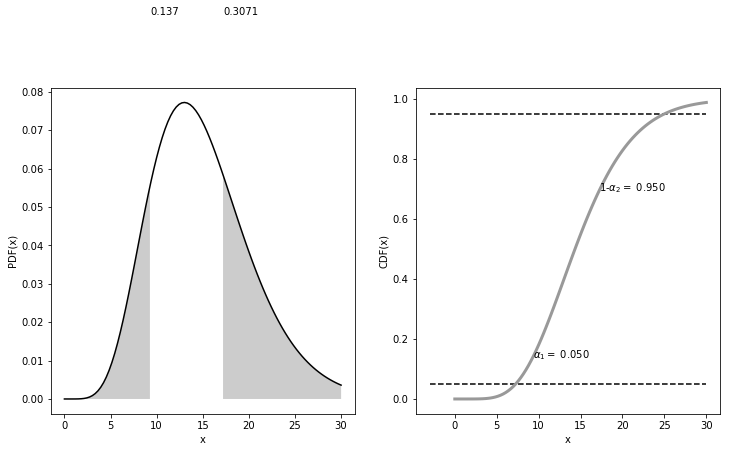

In [17]:
alpha_2=alpha/2
alpha_1=alpha/2

u_1=L
u_2=R

x = np.linspace(0,30,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(0, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,30)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.3f' % np.round(alpha_1,3))
axs[1].hlines(alpha_1, -3, 30, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.3f' % np.round(1-alpha_2,3))
axs[1].hlines(1-alpha_2, -3, 30, linestyles='--')
plt.show()